# IBM-HHRR_ATTRITION_EDA_V4

# PREVIOUS TASKS

### 1.- Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
%matplotlib inline

### 2.- Load data

In [2]:
df = pd.read_csv(r'C:\Users\TrendingPC\Desktop\PROYECTOS\HHRR-IBM_ATTRITION\HR-Employee-Attrition.csv')

In [3]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


### 3.- Check variables types and NA .

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isna().sum().sort_values(ascending = False)

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

### 4.- Functions

In [6]:
def continuous_statistics(data):
    # Calculate describe
    statistics = data.describe().T
    # Add the median
    statistics['median'] = data.median()
    # Reorder columns so that the median is next to the mean
    statistics = statistics.iloc[:, [0, 1, 8, 2, 3, 4, 5, 6, 7]]
    # Return the statistics
    return statistics

In [7]:
# Function to map multiple groups of variables
def map_multiple_variables(dataframe, mappings):
    """
    Maps multiple columns in a DataFrame based on a list of (variables, mapping dictionary) pairs.
    
    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data to transform.
        mappings (list of tuples): A list of tuples where each tuple contains:
                                   - A list of column names to map.
                                   - A dictionary defining the mapping for those columns.
    
    Returns:
        pd.DataFrame: The transformed DataFrame with mapped values.
    """
    for variables, mapping_dict in mappings:
        # Iterate over each variable in the current group
        for variable in variables:
            if variable in dataframe.columns:
                # Apply the mapping to the column
                dataframe[variable] = dataframe[variable].map(mapping_dict)
    return dataframe

In [8]:
def graficos_eda_categorical(cat):
    # Calculate the number of rows we need
    filas = ceil(cat.shape[1] / 2)

    # Define the plot
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    # Flatten the axes to iterate as if it were 1D rather than 2D
    ax = ax.flat 

    # Create the loop that adds the plots
    for cada, variable in enumerate(cat):
        # Plot the horizontal bar plot
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        
        # Add title to each plot
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        
        # Add tick parameters for labels
        ax[cada].tick_params(labelsize = 12)

        # Get the value counts and calculate the relative frequency
        value_counts = cat[variable].value_counts()
        total = len(cat[variable])
        relative_freq = value_counts / total
        
        # Add absolute and relative frequencies as labels on the bars
        for i, v in enumerate(value_counts):
            # Absolute frequency
            ax[cada].text(v + 5, i, f'{v} ({relative_freq[i]*100:.2f}%)', va='center', fontsize=10)

    # Adjust the margins so everything fits within the plot
    plt.tight_layout()

In [9]:
def eda_single_dataframe_grouped_graphs(df, variables):
    """
    Generates graphs for a single DataFrame with variables grouped by meaning.
    - Categorical variables are displayed as horizontal bar charts.
    - Continuous variables are displayed as boxplots.
    - Each row represents a variable in the group.
    
    Parameters:
    df: pandas DataFrame
        The DataFrame for analysis.
    variables: list
        List of variables to plot.
    """
    # Initialize a plot position counter
    plot_idx = 0
    all_vars = variables  # Directly use the passed list of variables

    # Identify categorical and continuous variables in the dataframe
    cat_vars = df.select_dtypes(include=['object', 'category']).columns
    cont_vars = df.select_dtypes(include=['number']).columns

    # Calculate the number of rows needed (two plots per row)
    rows = ceil(len(all_vars) / 2)  # Two plots per row

    # Create subplots (2 columns per row)
    f, ax = plt.subplots(nrows=rows, ncols=2, figsize=(16, rows * 6))
    ax = ax.flat  # Flatten axis array for easier indexing

    # Loop through each variable in the `all_vars` list
    for variable in all_vars:
        if variable in cat_vars:
            # Plot for categorical variable
            counts = df[variable].value_counts()
            relative = (counts / counts.sum()) * 100
            counts.plot.barh(ax=ax[plot_idx], color="skyblue", edgecolor="black")
            ax[plot_idx].set_title(f"{variable}", fontsize=12, fontweight="bold")
            max_count = counts.max()
            ax[plot_idx].set_xlim(0, max_count * 1.2)
            for i, (abs_val, rel_val) in enumerate(zip(counts.values, relative.values)):
                align = 'left' if abs_val < max_count * 0.8 else 'right'
                offset = 2 if align == 'left' else -2
                ax[plot_idx].annotate(f'{abs_val} ({rel_val:.1f}%)', xy=(abs_val, i),
                                     va='center', ha=align, fontsize=10,
                                     color="black", xytext=(offset, 0), textcoords='offset points')
        elif variable in cont_vars:
            # Plot for continuous variable
            df.boxplot(column=variable, ax=ax[plot_idx], vert=False, patch_artist=True,
                       boxprops=dict(facecolor="skyblue"))
            ax[plot_idx].set_title(f"{variable}", fontsize=12, fontweight="bold")

        # Move to the next subplot
        plot_idx += 1

    # Remove any empty subplots
    for cada in range(len(all_vars) * 2, len(ax)):
        f.delaxes(ax[cada])

    plt.tight_layout()
    plt.show()

### 5.- Analysis Variables

#### 5.1.- Continue Variable

In [10]:
continuous_statistics(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Age,1470.0,36.923810,36.0,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,802.0,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,7.0,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,3.0,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,1.0,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,1020.5,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,3.0,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,66.0,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,3.0,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,2.0,1.106940,1.0,1.00,2.0,3.00,5.0


#### 5.1.1 .- Adjustments in Continuous Variables:

* Map levels of various variables to make them clearer.
    
* Delete EmployeeCount as it only has one unique value.

In [11]:
# Define the mappings: a list of (variables, mapping dictionary) pairs
mappings = [
    (['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance'], 
     {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}),
    (['JobLevel'], 
     {1: 'Entry-level', 2: 'Intermediate', 3: 'Supervisory', 4: 'Managerial', 5: 'Executive'}),
    (['Education'], 
     {1: 'High School', 2: 'Associate Degree', 3: 'Bachelor’s Degree', 4: 'Master’s Degree', 5: 'Doctorate'}),
    (['PerformanceRating'], 
     {1: 'Poor', 2: 'Needs Improvement', 3: 'Satisfactory', 4: 'Exceptional'})
]

# Apply the transformation to the DataFrame
df = map_multiple_variables(df, mappings)

# Delete column
df = df.drop(columns=['EmployeeCount', 'StandardHours'])

In [12]:
continuous_statistics(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Age,1470.0,36.923810,36.0,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,802.0,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,7.0,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeNumber,1470.0,1024.865306,1020.5,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,66.0,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,14235.5,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.0,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,14.0,3.659938,11.0,12.00,14.0,18.00,25.0
StockOptionLevel,1470.0,0.793878,1.0,0.852077,0.0,0.00,1.0,1.00,3.0


#### 5.2.- Categorical Variable

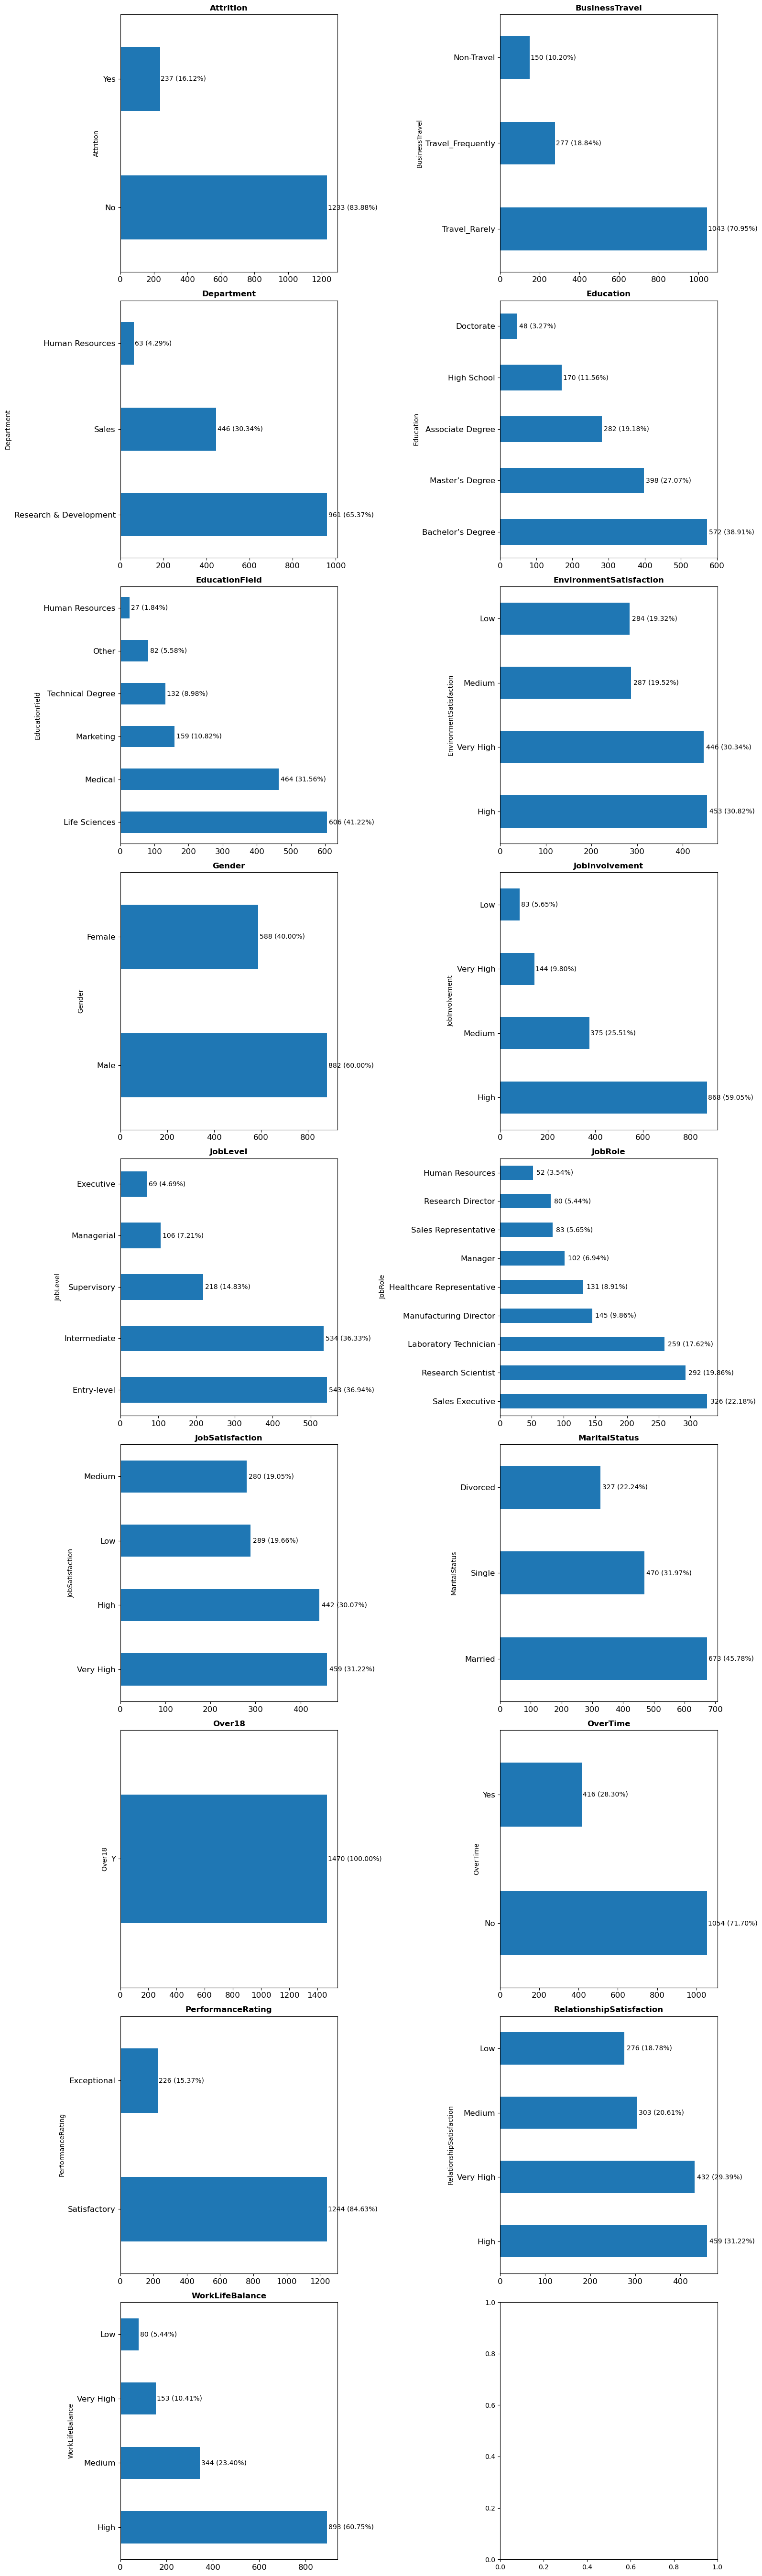

In [13]:
graficos_eda_categorical(df.select_dtypes('O'))

#### 5.1.2 .- Adjustments in Categorical Variables:
     Delete Over18  it only has one unique value.


In [14]:
df = df.drop(columns=['Over18'])

In [15]:
df_attrition = df[df['Attrition'] == 'Yes']

# Insight Generation

In [16]:
df.Attrition.value_counts(normalize = True)*100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

### **Group variables by meaning**

In [17]:
column_groups_final = {
    "Demographic": [
        'Age', 'Gender', 'MaritalStatus', 'Education', 'EducationField'],
    "JobInformation": [
        'Department','JobLevel', 'JobRole', 'DistanceFromHome', 'NumCompaniesWorked',
        'TotalWorkingYears', 'JobInvolvement', 'YearsAtCompany', 'YearsInCurrentRole', 
        'YearsWithCurrManager','TrainingTimesLastYear',
    ],
    "Compensation": [
        'MonthlyRate', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel'
    ],
    "Performance": [
        'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating'
    ],
    "Engagement": [
        'OverTime', 'BusinessTravel', 'WorkLifeBalance', 'JobInvolvement']
}

total_variables = ["Demographic", "JobInformation", "Compensation", "Performance", "Engagement"]

### **Demographic:**

This group includes variables that describe the employee's personal characteristics, such as age, gender, education level, and marital status. These variables are important for understanding turnover trends based on the employee's personal attributes.

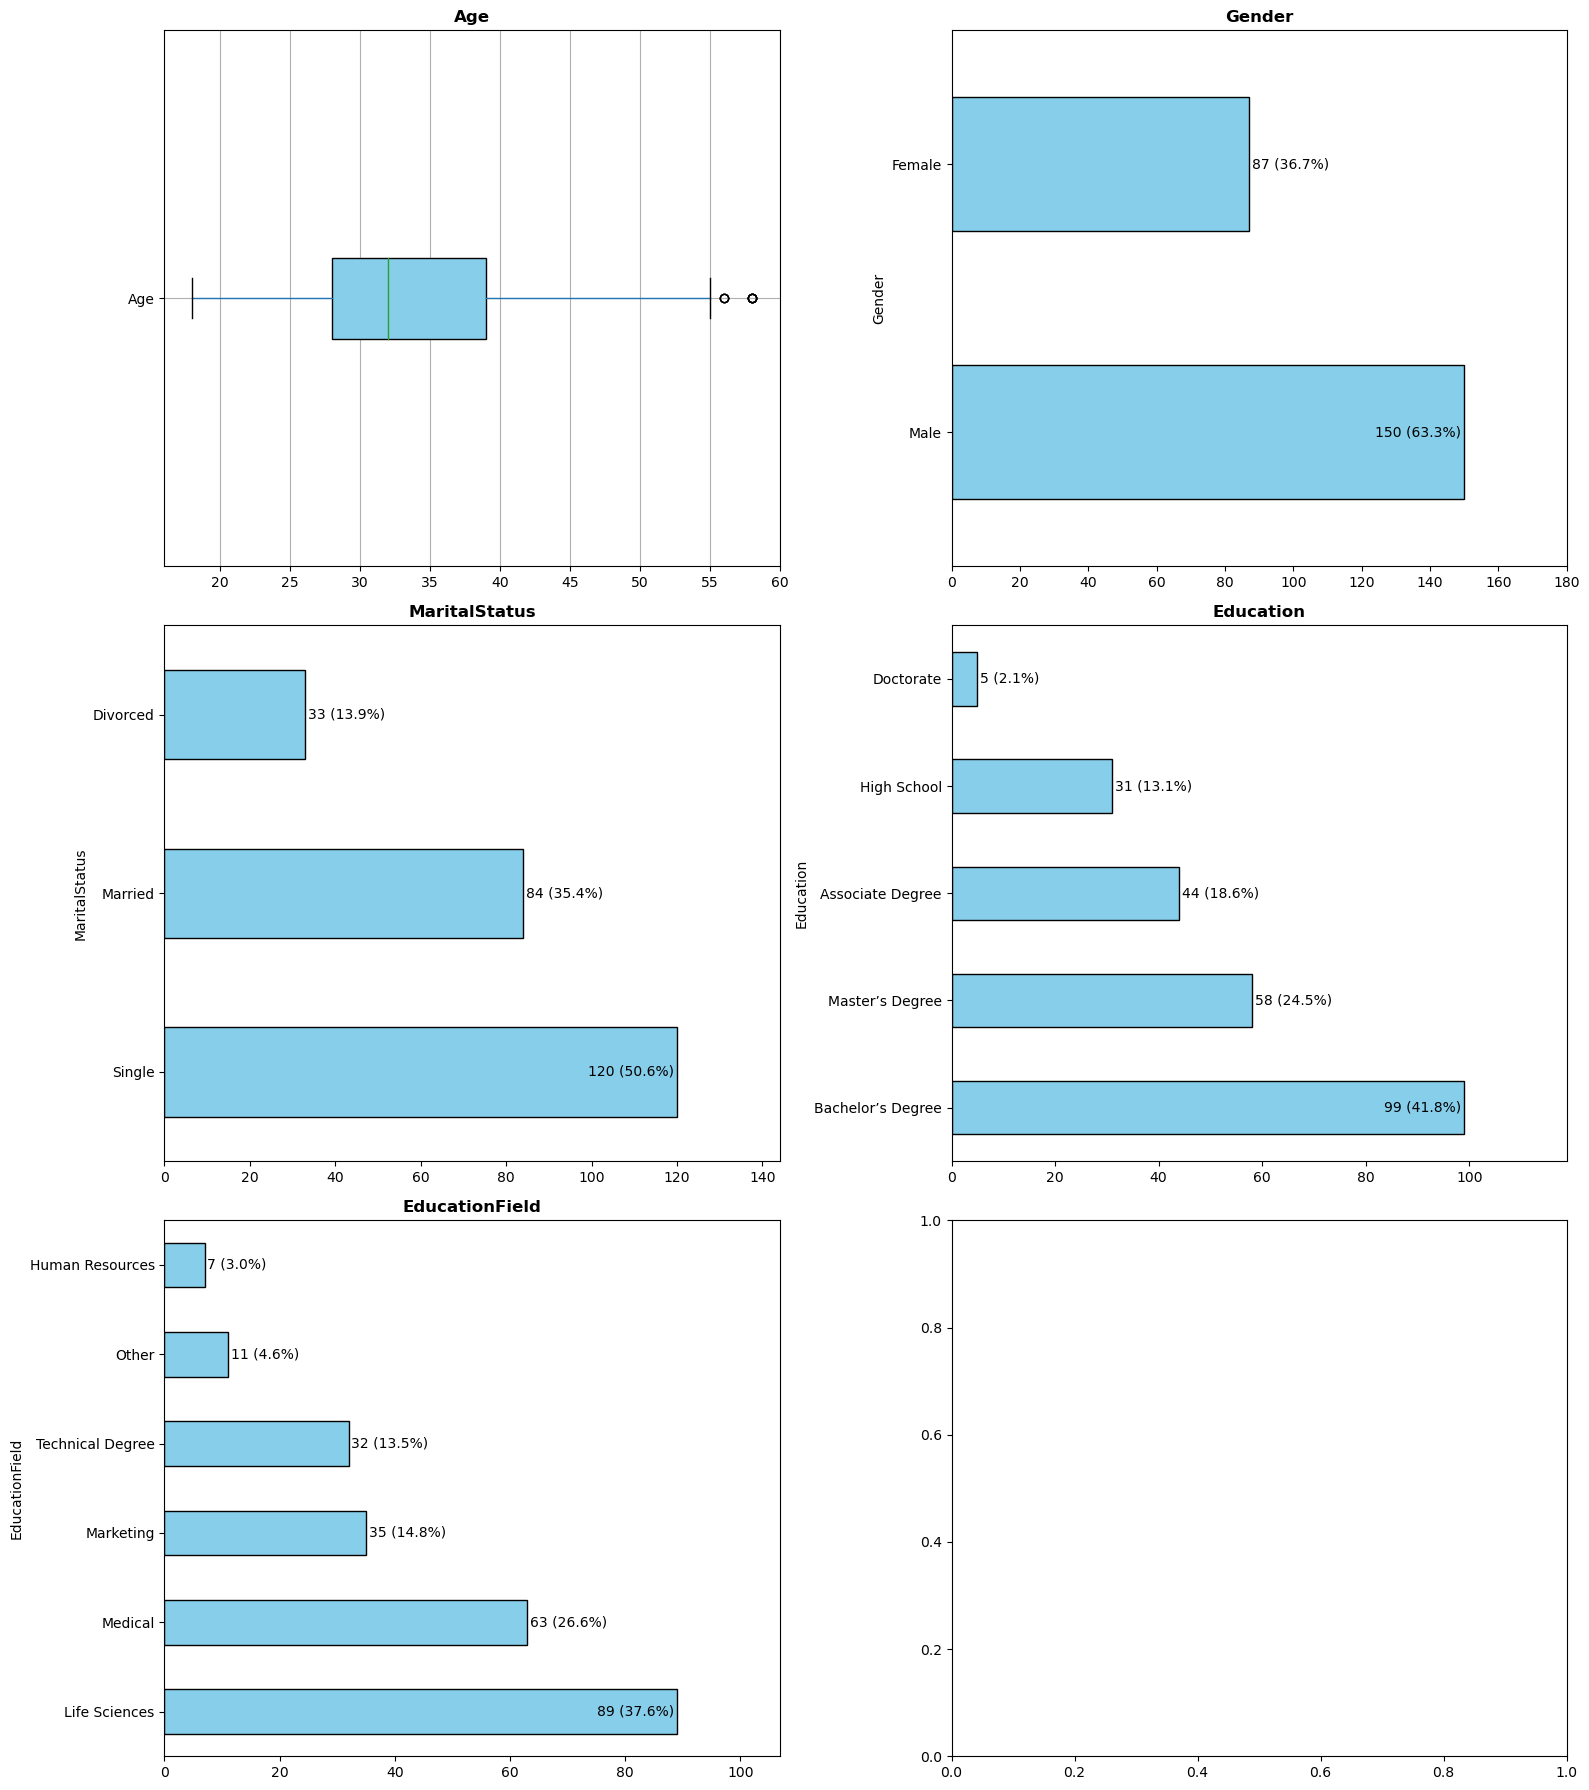

In [18]:
eda_single_dataframe_grouped_graphs(df_attrition, column_groups_final["Demographic"])

**Conclusions:**

The company's workforce attrition is primarily made up of individuals aged between 30 and 45 years. 

Furthermore, a significant portion of the workforce consists mostly of men. .

Regarding marital status, almost half of the employees are single. 

In terms of educational level, 60% of the employees have higher education, including university degrees, master's degrees, and doctorates. 

Lastly, 60% of the employees have training in fields related to medicine or life sciences.

### **JobInformation:**

Variables related to the employee's career and work experience, such as years worked, the job level, and their involvement and experience within the company. These variables help explore the relationship between professional trajectory and turnover.

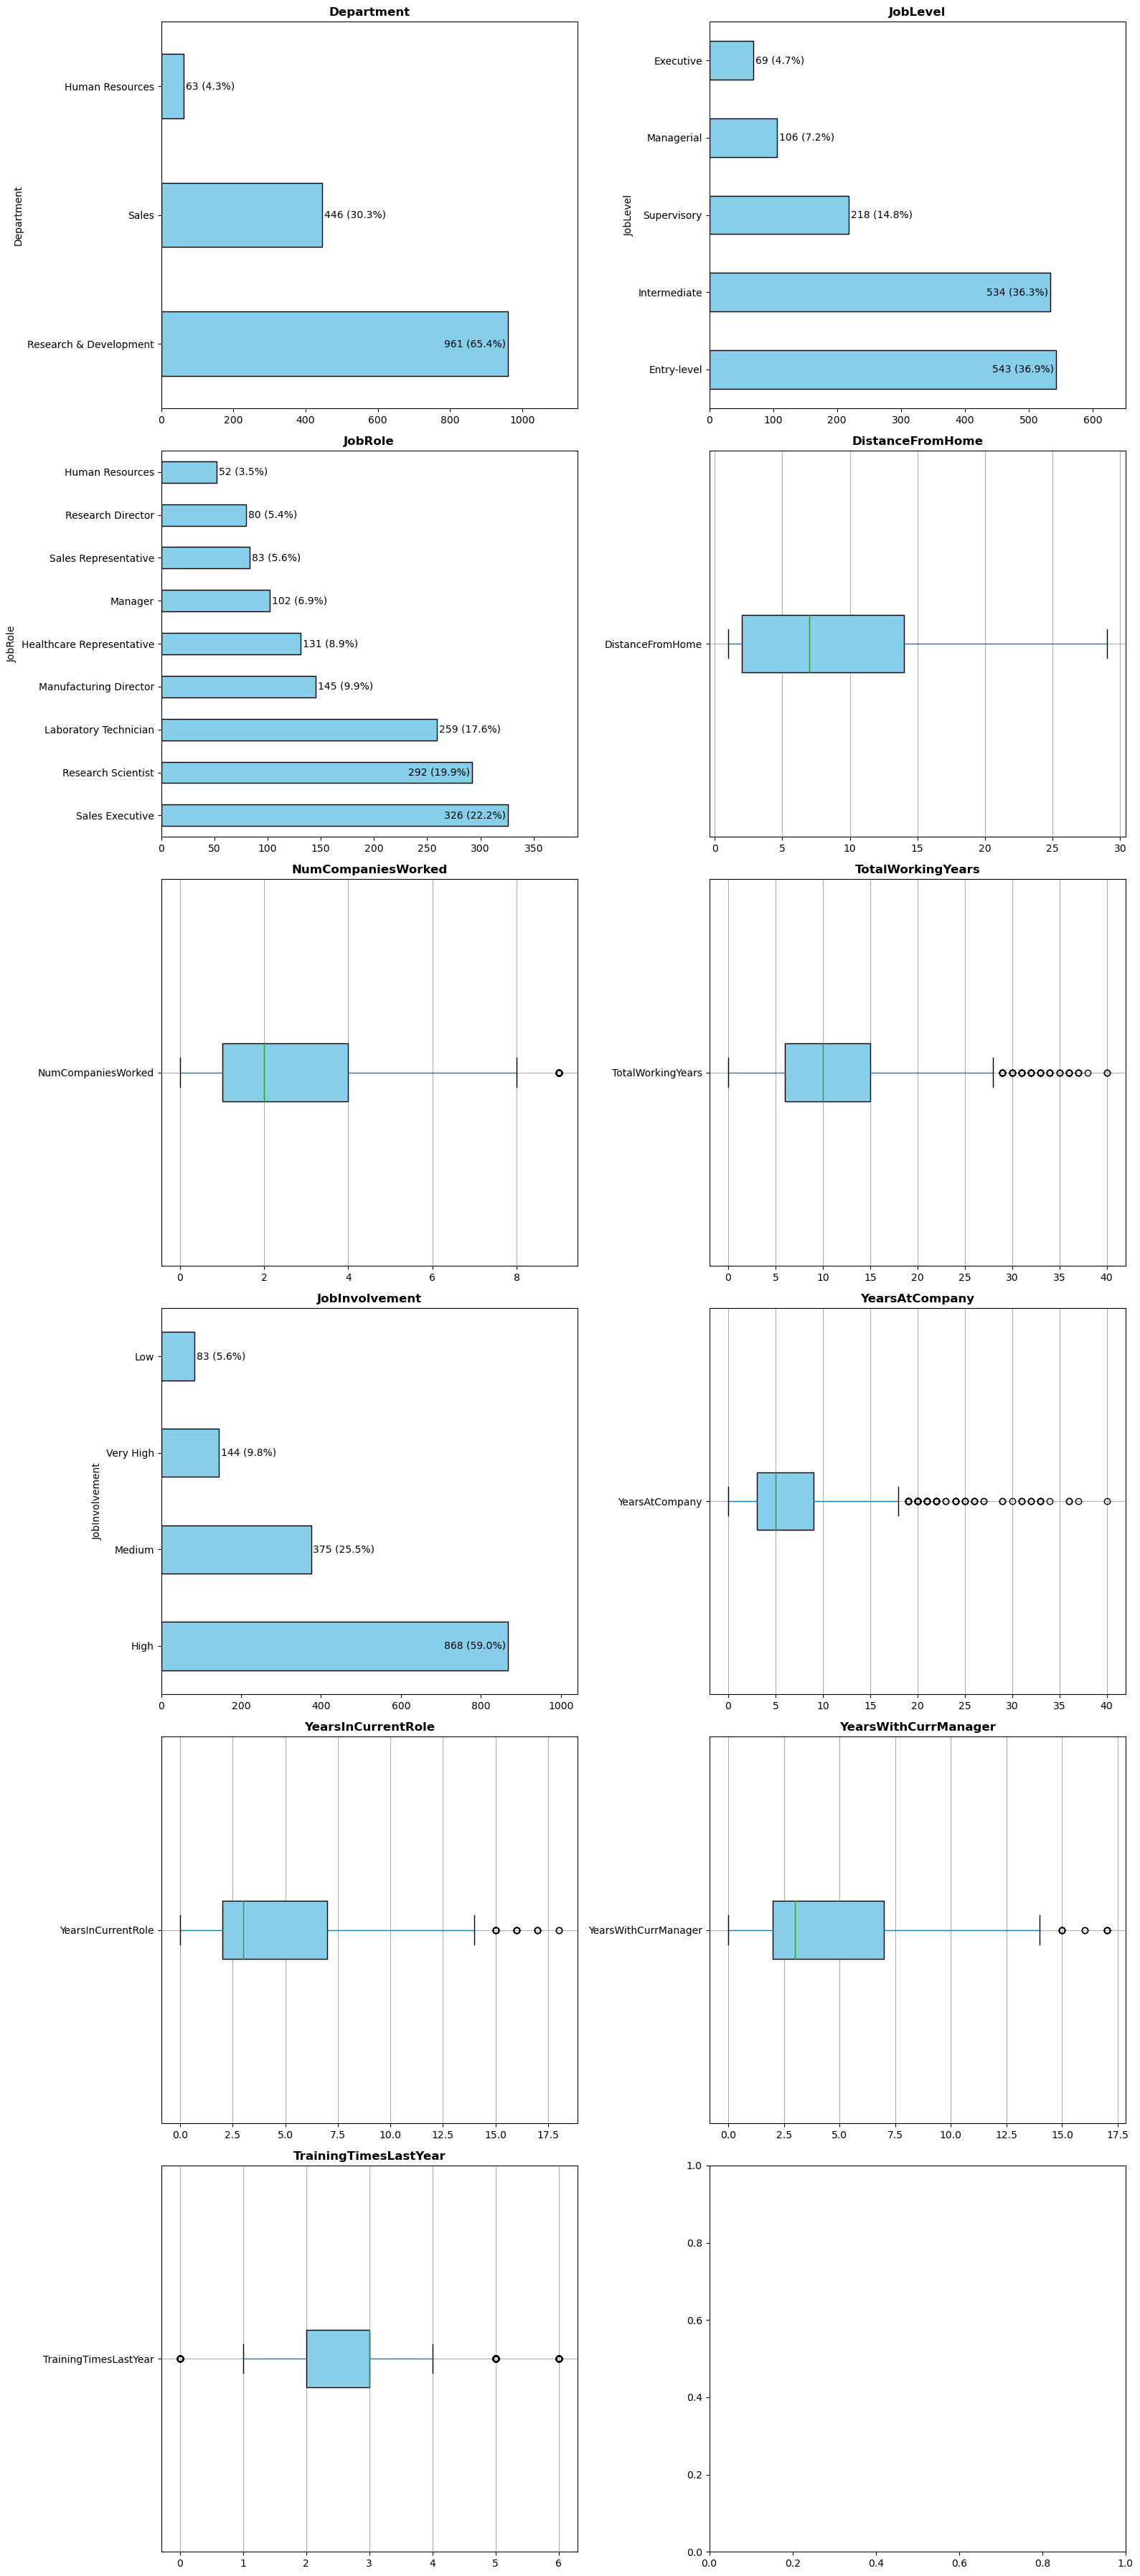

In [19]:
eda_single_dataframe_grouped_graphs(df, column_groups_final["JobInformation"])

### **Conclusions:**

The workforce is divided into three departments: R&D (65%), sales (30%), and HR (5%).

The company's structure follows a pyramid shape, with 65% of employees in entry or intermediate levels. 

The most common job positions within the company are sales executive, research scientist, and laboratory technician.

The employees are professionals with work experience ranging from 5 to 15 years, having worked in between 1 and 4 previous companies. 

Their tenure within the company ranges from 4 to 9 years, while their time in the current role varies from 2 to 6 years.

### **Compensation:**

This group includes variables related to the employee's salary and benefits, such as monthly income, stock options, and salary rates. Understanding how economic incentives affect employees' decisions to stay or leave is crucial.

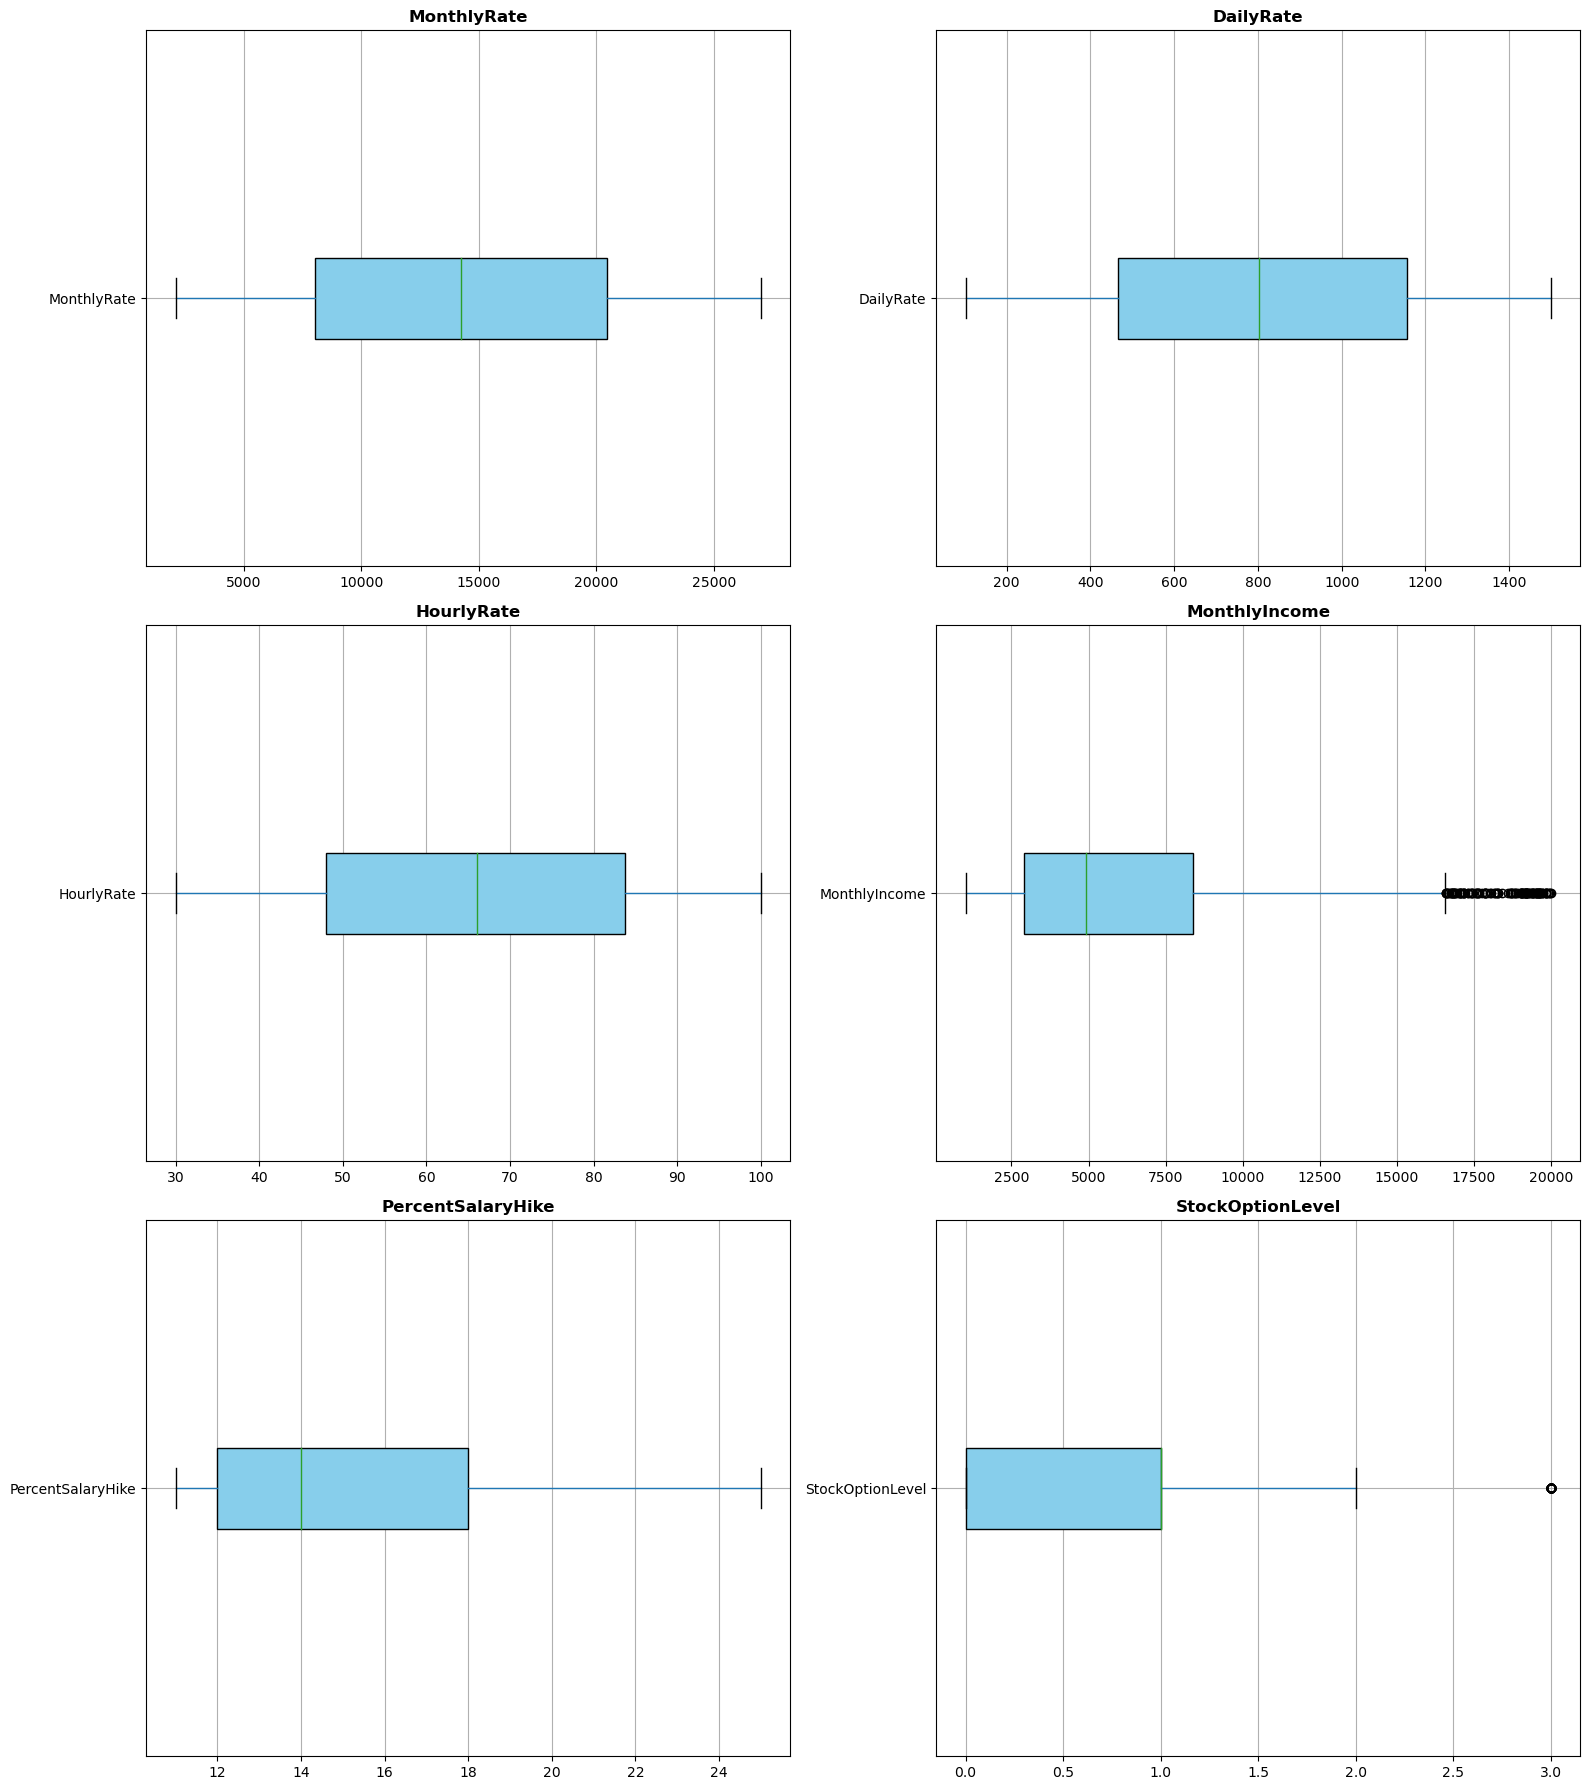

In [20]:
eda_single_dataframe_grouped_graphs(df, column_groups_final["Compensation"])

### **Performance:**

Includes variables related to job satisfaction and employee performance. Variables such as satisfaction with the work environment and performance ratings help understand if employees who are satisfied and perform well are less likely to leave the company.

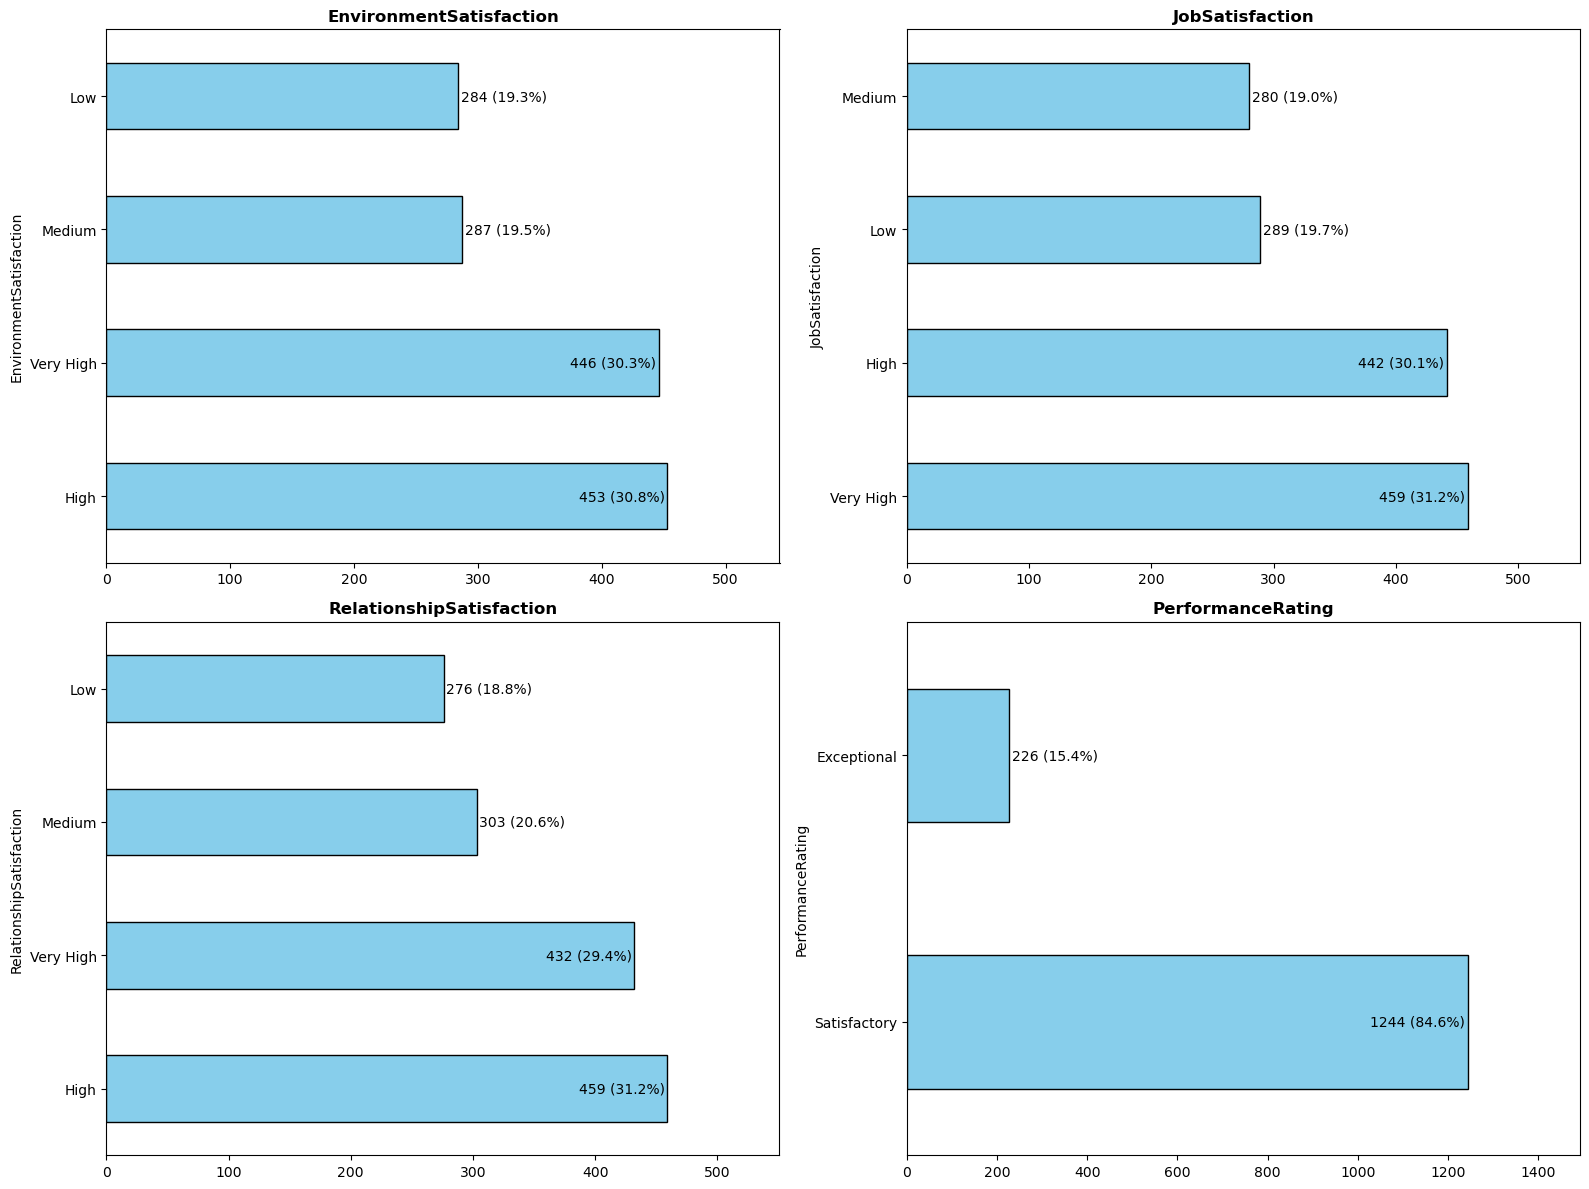

In [21]:
eda_single_dataframe_grouped_graphs(df, column_groups_final["Performance"])

### **Engagement:**

This group encompasses variables related to the employee's commitment to the company and their workload, such as overtime and distance from home to the workplace. Employees who work more hours or have a longer commute may have a higher risk of turnover.

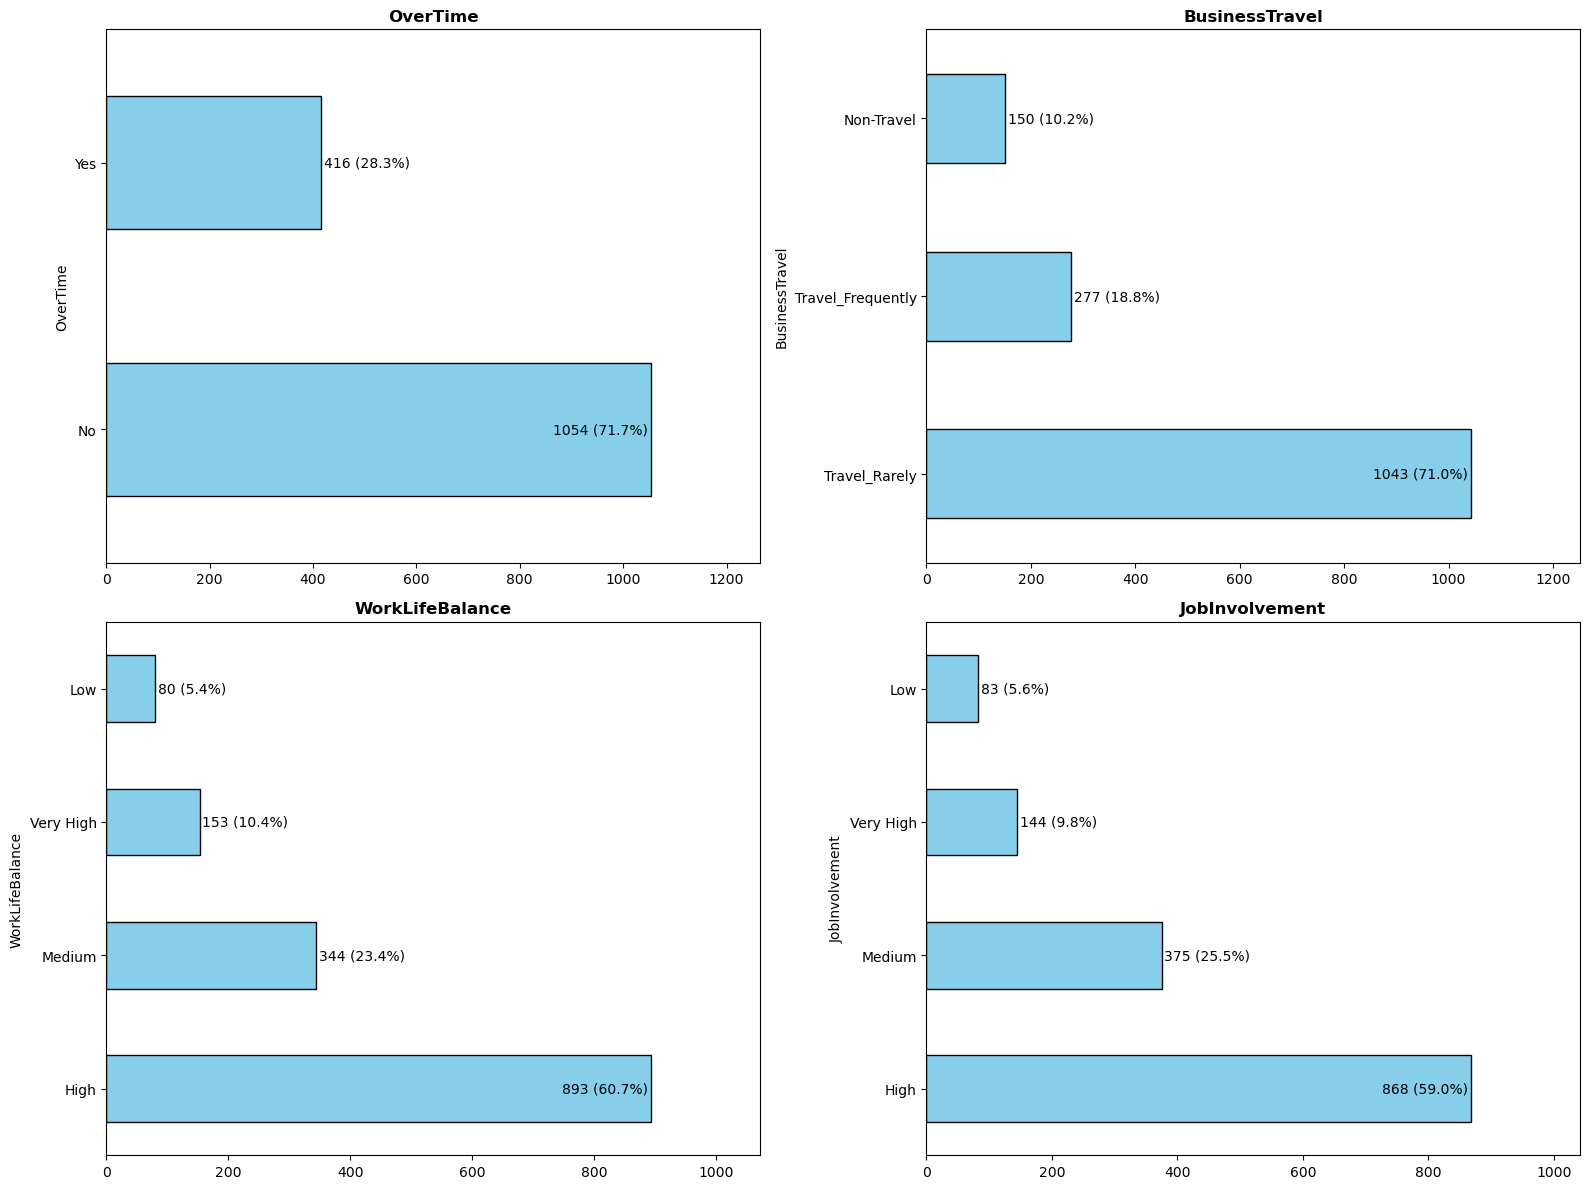

In [22]:
eda_single_dataframe_grouped_graphs(df, column_groups_final["Engagement"])

### **Conclusions:**

70% of the workers do not work overtime and rarely travel for work purposes. 

Additionally, 60% of employees report a high degree of work-life balance and job performance, suggesting a good equilibrium between personal life and work responsibilities.

### **Final Summary:**

The company’s workforce is mostly made up of individuals aged 30-45, with a majority being male. Nearly half are single, and 60% hold higher education degrees, including university, master’s, or doctorates. Additionally, 70% have training in medical or life sciences.

The company is structured into three main departments: R&D (65%), sales (30%), and HR (5%). It has a pyramid-like structure, with 65% of employees in entry or intermediate-level positions. Common roles include sales executive, research scientist, and laboratory technician.

Employees typically have 5-15 years of experience, having worked at 1-4 previous companies, with an average tenure of 4-9 years in the company and 2-6 years in their current role.

70% do not work overtime or travel frequently, and 60% report a strong work-life balance and job performance, indicating a healthy balance between personal life and work.

## **Economic Impact of Employee Turnover**

Employee turnover has a significant economic impact on organizations due to recruitment, training, lost productivity, and other associated costs. Based on the "Cost of Turnover" study by the Center for American Progress, the cost of replacing employees is directly tied to their salary range:

    **Employees earning less than $30,000:**
    Turnover costs are approximately 16.1% of their annual salary. For instance, replacing an employee earning $28,000 costs around $4,508.

    **Employees earning between $30,000 and $50,000:**
    Turnover costs rise to 19.7% of their annual salary. For example, replacing an employee earning $40,000 costs approximately $7,880.

    **Employees earning between $50,000 and $75,000:**
    Costs further increase to 20.4% of their annual salary. For an employee earning $60,000, the turnover cost is about $12,240.

    **Employees earning over $75,000:**
    The cost peaks at 21% of their annual salary. For instance, replacing an employee earning $100,000 incurs a cost of $21,000.

    https://www.americanprogress.org/article/there-are-significant-business-costs-to-replacing-employees/

In [23]:
# Create a new column called annual_salary 

df['annual_salary'] = df.MonthlyIncome.transform(lambda x: x*12)
df[['MonthlyIncome','annual_salary']]

,MonthlyIncome,annual_salary
0,5993,71916
1,5130,61560
2,2090,25080
3,2909,34908
4,3468,41616
...,...,...
1465,2571,30852
1466,9991,119892
1467,6142,73704
1468,5390,64680


In [24]:
# Calculate the economic impact of each employee leaving the company

# List of conditions
conditions = [
    (df['annual_salary'] <= 30000),
    (df['annual_salary'] > 30000) & (df['annual_salary'] <= 50000),
    (df['annual_salary'] > 50000) & (df['annual_salary'] <= 75000),
    (df['annual_salary'] > 75000)
]

# List of results
results = [
    df['annual_salary'] * 0.161, 
    df['annual_salary'] * 0.197, 
    df['annual_salary'] * 0.204, 
    df['annual_salary'] * 0.21
]

# Apply np.select
df['economic_impact'] = np.select(conditions, results, default=-999)


## Calculate attrition cost in past

In [25]:
total_cost = int(df.loc[df.Attrition=="Yes"].economic_impact.sum())
total_cost

2719005

## How Much Does It Cost Us When Employees Are Not Motivated? (Losses in Engagement == Low)

In [26]:
int(df.loc[(df.Attrition == "Yes") & (df.JobInvolvement == 'Low')].economic_impact.sum())

368672

## How Much Money Could We Save by Improving Employee Retention?

To estimate potential savings, we calculate three scenarios with 10%, 20%, and 30% reductions in attrition costs. These savings reflect the financial impact of better retention strategies focused on these critical roles and departments.

In [27]:
print(f"Reduce 10% of attrition implies a saving of: {int(total_cost*0.1)} $/year.")
print(f"Reduce 20% of attrition implies a saving of: {int(total_cost*0.2)} $/year.")
print(f"Reduce 30% of attrition implies a saving of: {int(total_cost*0.3)} $/year.")

Reduce 10% of attrition implies a saving of: 271900 $/year.
Reduce 20% of attrition implies a saving of: 543801 $/year.
Reduce 30% of attrition implies a saving of: 815701 $/year.


In [28]:
def calculate_jobrole_metrics(df, job_roles, stages):
    """
    Calculate metrics related to attrition, retention, and potential savings for given JobRoles.

    Parameters:
        df (DataFrame): The input DataFrame containing employee data.
        job_roles (list): List of JobRoles to calculate metrics for.
        stages (list): List of stage percentages for savings calculation.

    Returns:
        DataFrame: A DataFrame with the calculated metrics.
    """
    # Define column names
    columns = [
        'JobRole', 
        'TotalActual',  # Total number of employees for each JobRole
        'TotalPast',  # Total number of employees who left (attrition) for each JobRole
        'PercAttrition',  # Attrition rate (percentage of employees who left)
        'TotalActive',  # Total number of currently active employees for each JobRole
        'ForecastAttrition'  # Predicted future attrition for each JobRole
        ] + [f'Saving: {stages[i]}' for i in range(len(stages))]  # Savings calculations for each stage
    
    # List to store results for each JobRole
    total_results = []
    
    for jobrole in job_roles:
        results = []
        
        # Total number of employees for the given JobRole
        jobrole_total_actual = len(df.loc[df.JobRole == jobrole])
        results.append(jobrole)
        results.append(jobrole_total_actual)
        
        # Total number of employees who left (attrition) for the given JobRole
        jobrole_total_past = len(df.loc[(df.JobRole == jobrole) & (df.Attrition == "Yes")])
        results.append(jobrole_total_past)
        
        # Attrition rate calculation
        perc_attrition = round(jobrole_total_past / jobrole_total_actual, 2) if jobrole_total_actual > 0 else 0
        results.append(perc_attrition)
        
        # Total number of active employees for the given JobRole
        jobrole_total_active = len(df.loc[(df.JobRole == jobrole) & (df.Attrition == "No")])
        results.append(jobrole_total_active)
        
        # Forecasted attrition based on the attrition rate and active employees
        forecast_jobrole = int(jobrole_total_active * perc_attrition)
        results.append(forecast_jobrole)
        
        # Calculate savings for each stage
        savings = [
            int(df.loc[(df.JobRole == jobrole) & (df.Attrition == "No"), 'economic_impact'].sum() * perc_attrition * stage)
            for stage in stages
        ]
        results.extend(savings)
        
        # Store the results for the current JobRole in the results list
        total_results.append(results)
    
    # Convert the list of results into a DataFrame
    df_results = pd.DataFrame(total_results, columns=columns)
    
    return df_results


In [29]:
stages = [0.1, 0.2, 0.3, 0.4]
jobrole_most_attrition = ['Sales Representative', 'Sales Executive', 'Laboratory Technician', 'Research Scientist']

In [30]:
saving_stages = calculate_jobrole_metrics(df, jobrole_most_attrition, stages )
saving_stages

,JobRole,TotalActual,TotalPast,PercAttrition,TotalActive,ForecastAttrition,Saving: 0.1,Saving: 0.2,Saving: 0.3,Saving: 0.4
0,Sales Representative,83,33,0.40,50,20,12558,25116,37674,50232
1,Sales Executive,326,57,0.17,269,45,77482,154964,232447,309929
2,Laboratory Technician,259,62,0.24,197,47,36496,72992,109488,145984
3,Research Scientist,292,47,0.16,245,39,30360,60720,91080,121440


In [31]:
print(f"Total saving is range: {saving_stages['Saving: 0.1'].sum()} - {saving_stages['Saving: 0.4'].sum()} $")

Total saving is range: 156896 - 627585 $


In [32]:
# Save to csv
df.to_csv(r'C:\Users\TrendingPC\Desktop\PROYECTOS\HHRR-IBM_ATTRITION\HR-Employee-Attrition_preprocesed.csv')

In [33]:
# Copy to apply machine learning algorithms:
df_ml = df.copy()
df_ml.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,annual_salary,economic_impact
0,41,Yes,Travel_Rarely,1102,Sales,1,Associate Degree,Life Sciences,1,Medium,...,0,8,0,Low,6,4,0,5,71916,14670.864
1,49,No,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,2,High,...,1,10,3,High,10,7,1,7,61560,12558.240
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Associate Degree,Other,4,Very High,...,0,7,3,High,0,0,0,0,25080,4037.880
3,33,No,Travel_Frequently,1392,Research & Development,3,Master’s Degree,Life Sciences,5,Very High,...,0,8,3,High,8,7,3,0,34908,6876.876
4,27,No,Travel_Rarely,591,Research & Development,2,High School,Medical,7,Low,...,1,6,3,High,2,2,2,2,41616,8198.352


In [34]:
# Copy df for transformations
df_ml = df.copy()

# Map Attrition Variable
df_ml['Attrition'] = df_ml['Attrition'].map({'No': 0, 'Yes': 1})

from sklearn.preprocessing import OneHotEncoder

# Separate the target variable before processing
# This ensures 'Attrition' is not altered during categorical or numerical processing
target = df_ml['Attrition']

# Select categorical variables, excluding 'Attrition'
cat = df_ml.select_dtypes('O').drop(columns='Attrition', errors='ignore')

# Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Fit the encoder to the categorical variables
ohe.fit(cat)

# Transform the categorical variables into one-hot encoded variables
cat_ohe = pd.DataFrame(ohe.transform(cat), 
                       columns=ohe.get_feature_names_out(input_features=cat.columns)).reset_index(drop=True)

# Select numerical variables, including 'Attrition' if present
num = df_ml.select_dtypes('number').reset_index(drop=True)

# Combine the one-hot encoded categorical variables and numerical variables
df_ml = pd.concat([cat_ohe, num], axis=1)

# Reassign the 'Attrition' column to ensure it remains in the final DataFrame
df_ml['Attrition'] = target  # Add the target column back to the final DataFrame

In [35]:
df_ml

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Associate Degree,Education_Bachelor’s Degree,Education_Doctorate,Education_High School,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,annual_salary,economic_impact
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,11,0,8,0,6,4,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,23,1,10,3,10,7,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,15,0,7,3,0,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11,0,8,3,8,7,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,12,1,6,3,2,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,17,1,17,3,5,2,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,15,1,9,5,7,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,20,1,6,0,6,2,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,14,0,17,3,9,6,0,8,64680,13194.720


In [36]:
df_ml.to_csv(r'C:\Users\TrendingPC\Desktop\PROYECTOS\HHRR-IBM_ATTRITION\HR-Employee-ML.csv')